In [72]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.5f}'.format

In [73]:
raw_data = pd.read_csv('Data/house_data_details_cleaned.csv')
df = raw_data.copy()

In [74]:
#profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
#profile.to_file("RealEstateAVM_ProfileReport.html")

In [75]:
df.head()

,latitude,longitude,address,property_type,home_size,lot_size,year_built,parcel_number,realtyID,county,subdivision,census,tract,lot,zoning,date,sale_price,estimated_value,sex_offenders,crime_index,enviornmental_hazards,natural_disasters,school quality,url,bedrooms,bathrooms
0,33.97462,-118.13368,6224 Nye St,Condominium,1357.00000,22215.60000,1988.00000,6357012043,1111054477.00000,Los Angeles,45351,1.00000,532304.00000,1,CMR3,2020-09-28,469000.00000,439000.00000,7,High,15,1,Average,https://www.realtytrac.com/property/ca/commerc...,3.00000,3.00000
1,34.15656,-118.39689,4723 Laurel Canyon Blvd,Restaurant,2250.00000,9799.00000,1959.00000,2356037034,1111055289.00000,Los Angeles,7360,1.00000,143400.00000,10,LAC2,2020-09-28,1910000.00000,nan,5,NaN,6,1,Excellent,https://www.realtytrac.com/property/ca/valley-...,nan,nan
2,34.67778,-118.45117,18118 Elizabeth Lake Rd,Apartment house (5+ units),1454.00000,13635.00000,1948.00000,3242015023,1111055911.00000,Los Angeles,NaN,2.00000,920102.00000,4,LCC4*,2020-09-28,325000.00000,nan,0,NaN,2,1,NaN,https://www.realtytrac.com/property/ca/lake-hu...,7.00000,6.00000
3,34.07296,-118.06690,9259 Ramona Blvd,Single Family Residence,1682.00000,7000.00000,1978.00000,8594027016,1111055994.00000,Los Angeles,ROSEMEAD,2.00000,432901.00000,6,RMPOD*,2020-09-28,738000.00000,752000.00000,3,Moderate,11,1,Excellent,https://www.realtytrac.com/property/ca/rosemea...,3.00000,2.00000
4,33.77772,-118.15491,825 Obispo Ave,"Triplex (3 units, any combination)",1958.00000,6754.00000,1938.00000,7258013016,1111056010.00000,Los Angeles,1,2.00000,576904.00000,18,LBR2N,2020-09-28,1185000.00000,989000.00000,11,Slightly High,8,1,Average,https://www.realtytrac.com/property/ca/long-be...,4.00000,3.00000


In [76]:
df.describe()

,latitude,longitude,home_size,lot_size,year_built,parcel_number,realtyID,census,tract,sale_price,estimated_value,sex_offenders,enviornmental_hazards,natural_disasters,bedrooms,bathrooms
count,6303.00000,6303.00000,6068.00000,6284.00000,6105.00000,6378.00000,6377.00000,6307.00000,6307.00000,6158.00000,5816.00000,6378.00000,6378.00000,6378.00000,5835.00000,5835.00000
mean,-52.14586,-32.01328,2411.11239,42424.13440,1963.97674,5032195797.98322,1111176692.71084,2.02521,445313.17409,1106153.90224,883116.74691,7.53873,6.97727,1.20194,3.43925,2.68535
std,75.52944,75.52842,6256.05000,236622.96125,26.25626,2112498553.43211,246438.83776,1.12090,258664.78750,1971336.30139,522479.94599,13.14695,6.89617,0.43087,3.26813,3.09168
min,-118.88275,-118.86073,3.00000,283.00000,1883.00000,2004009012.00000,1110722482.00000,1.00000,0.00000,500.00000,104000.00000,0.00000,1.00000,0.00000,1.00000,1.00000
25%,-118.31732,-118.24206,1230.00000,6006.75000,1948.00000,3004006266.50000,1110958043.00000,1.00000,215500.50000,499000.00000,544975.00000,1.00000,3.00000,1.00000,2.00000,2.00000
50%,-118.01518,33.85525,1625.00000,7653.50000,1961.00000,5082013518.00000,1111202901.00000,2.00000,408703.00000,705500.00000,712000.00000,4.00000,5.00000,1.00000,3.00000,2.00000
75%,34.06119,34.10695,2302.00000,17284.50000,1984.00000,7138026760.25000,1111392666.00000,3.00000,601851.00000,1114375.00000,1050000.00000,9.00000,8.00000,1.00000,4.00000,3.00000
max,34.81875,34.78246,295336.80000,12486474.00000,2020.00000,8765016012.00000,1111598375.00000,8.00000,980008.00000,75454545.00000,2998000.00000,135.00000,91.00000,3.00000,96.00000,99.00000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   latitude               6303 non-null   float64
 1   longitude              6303 non-null   float64
 2   address                6367 non-null   object 
 3   property_type          6378 non-null   object 
 4   home_size              6068 non-null   float64
 5   lot_size               6284 non-null   float64
 6   year_built             6105 non-null   float64
 7   parcel_number          6378 non-null   int64  
 8   realtyID               6377 non-null   float64
 9   county                 6378 non-null   object 
 10  subdivision            5885 non-null   object 
 11  census                 6307 non-null   float64
 12  tract                  6307 non-null   float64
 13  lot                    5970 non-null   object 
 14  zoning                 6378 non-null   object 
 15  date

In [78]:
#Remove missing values for the target feature
df.dropna(inplace=True)
print(f'Number of observations before removing missing values: {raw_data.shape[0]}')
print(f'Number of observations after removing missing values: {df.shape[0]}')

Number of observations before removing missing values: 6378
Number of observations after removing missing values: 4263


In [79]:
#Convert date into a datetime object
df['date'] = pd.to_datetime(df['date'])

In [80]:
df.sort_values(by='date', ascending=False, inplace=True, ignore_index=True)
df['date']

0      2069-09-19
1      2069-07-01
2      2069-04-23
3      2069-01-22
4      2067-12-13
          ...    
4258   1970-11-23
4259   1970-10-06
4260   1970-09-22
4261   1970-08-14
4262   1970-02-10
Name: date, Length: 4263, dtype: datetime64[ns]

In [81]:
#Correct the dates
df['date'] = df['date'].apply(lambda x: x.replace(year= x.year-100) if x.year>2020 else x)
df.sort_values(by='date', ascending=False, inplace=True, ignore_index=True)
df['date']

0      2020-10-09
1      2020-10-09
2      2020-10-09
3      2020-10-09
4      2020-10-09
          ...    
4258   1967-12-13
4259   1966-11-29
4260   1965-01-11
4261   1964-12-18
4262   1964-07-02
Name: date, Length: 4263, dtype: datetime64[ns]

In [82]:
#Add a month and year column
df['month'] = df['date'].dt.to_period('M')
df['month']

0       2020-10
1       2020-10
2       2020-10
3       2020-10
4       2020-10
         ...   
4258    1967-12
4259    1966-11
4260    1965-01
4261    1964-12
4262    1964-07
Name: month, Length: 4263, dtype: period[M]

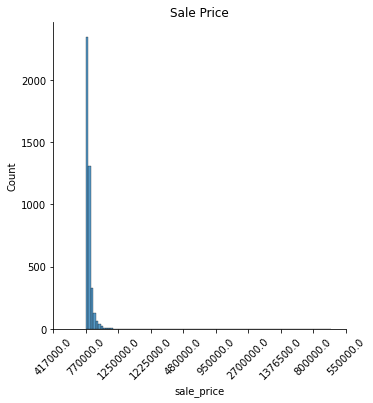

In [83]:
chart = sns.displot(df['sale_price'], bins=100)
plt.title('Sale Price')
plt.ticklabel_format(style='plain', axis='x')
chart.set(xticklabels=df['sale_price'])
chart.set_xticklabels(rotation=45);

In [84]:
#This function will identify the outlier boundaries for a variable

def find_skewed_boundaries(df, var, distance):
    
    IQR = df['sale_price'].quantile(.75) - df['sale_price'].quantile(.25)
    
    lower_boundary = df['sale_price'].quantile(.25) - (distance*IQR)
    upper_boundary = df['sale_price'].quantile(.75) + (distance*IQR)
    
    return upper_boundary, lower_boundary


sales_upper_boundary, sales_lower_boundary = find_skewed_boundaries(df, 'sale_price', 1.5)
print(f'The sale price upper boundary is {sales_upper_boundary}')

df_trimmed = df.loc[df['sale_price']<sales_upper_boundary,:]
print(f'Number of observations before removing outliers: {df.shape[0]}')
print(f'Number of observations after removing outliers: {df_trimmed.shape[0]}')

The sale price upper boundary is 1985000.0
Number of observations before removing outliers: 4263
Number of observations after removing outliers: 3899


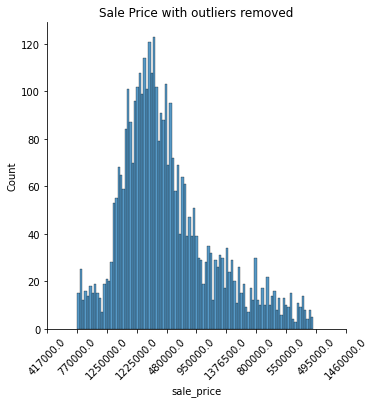

In [85]:
chart = sns.displot(df_trimmed['sale_price'], bins=100)
plt.title('Sale Price with outliers removed')
plt.ticklabel_format(style='plain', axis='x')
chart.set(xticklabels=df_trimmed['sale_price'])
chart.set_xticklabels(rotation=45);

In [86]:
temp = pd.concat([df_trimmed.groupby('property_type')['sale_price'].mean(), df_trimmed.groupby('property_type')['sale_price'].count(), df['property_type'].value_counts(normalize=True)], axis=1)
temp.columns = ['Average sale price', 'Count of property_type', 'Percentage of property type']
temp.sort_values(by=['Count of property_type'], axis=0,ascending=False, inplace=True)
print(f'Number of categories for property_type: {df_trimmed.property_type.nunique()}')
temp

Number of categories for property_type: 11


,Average sale price,Count of property_type,Percentage of property type
Single Family Residence,772495.10609,2790,0.72109
Condominium,642088.97104,656,0.15623
"Duplex (2 units, any combination)",781502.41176,170,0.04199
Planned Unit Development (PUD),717112.31884,138,0.03308
"Triplex (3 units, any combination)",838703.70370,54,0.01595
Apartment house (5+ units),1178564.48837,43,0.01783
"Quadplex (4 Units, Any Combination)",1006952.38095,42,0.01173
Mobile home,422500.00000,2,0.00047
Residential - Vacant Land,1004000.00000,2,0.00117
MISCELLANEOUS (Commercial),675000.00000,1,0.00023


In [88]:
bad_prop_types = ['MISCELLANEOUS   (Commercial)', 'Religious, Church, Worship (Synagogue, Temple, Parsonage)', 'Residential - Vacant Land', 'Mobile home']
print(f'Number of observations before removing infrequent property types: {df_trimmed.shape[0]}')

for col in bad_prop_types:
    indexNames = df_trimmed[(df_trimmed['property_type']==col)].index
    df_trimmed.drop(indexNames, inplace=True)
    

print(f'Number of observations after removing infrequent property types: {df_trimmed.shape[0]}')

Number of observations before removing infrequent property types: 3897
Number of observations after removing infrequent property types: 3893


In [89]:
temp2 = pd.concat([df_trimmed.groupby('property_type')['sale_price'].mean(), df_trimmed.groupby('property_type')['sale_price'].count(), df['property_type'].value_counts(normalize=True)], axis=1)
temp2.columns = ['Average sale price', 'Count of property_type', 'Percentage of property type']
temp2.sort_values(by=['Average sale price'], axis=0,ascending=False, inplace=True)
print(f'Number of categories for property_type: {df_trimmed.property_type.nunique()}')
temp2

Number of categories for property_type: 7


,Average sale price,Count of property_type,Percentage of property type
Apartment house (5+ units),1178564.48837,43.00000,0.01783
"Quadplex (4 Units, Any Combination)",1006952.38095,42.00000,0.01173
"Triplex (3 units, any combination)",838703.70370,54.00000,0.01595
"Duplex (2 units, any combination)",781502.41176,170.00000,0.04199
Single Family Residence,772495.10609,2790.00000,0.72109
Planned Unit Development (PUD),717112.31884,138.00000,0.03308
Condominium,642088.97104,656.00000,0.15623
Residential - Vacant Land,nan,nan,0.00117
Mobile home,nan,nan,0.00047
MISCELLANEOUS (Commercial),nan,nan,0.00023


In [94]:
def property_type_plot(df, var):
    
    categories = list(df[var].unique())
    df_copy = df.copy()
    
    for cat in categories:
        df = df_copy.loc[df_copy[var]==cat, :]
        if df.shape[0]>40:
            df.groupby('month')['sale_price'].mean().plot(figsize=(12,8))
            plt.ticklabel_format(style='plain', axis='y')
            plt.xlim('2015-01', df['month'].max())
            plt.ylim(df['sale_price'].min(), 4000000)
            plt.title(f'Average Sale Price by Month for {cat}')
            plt.show();
        else:
            continue

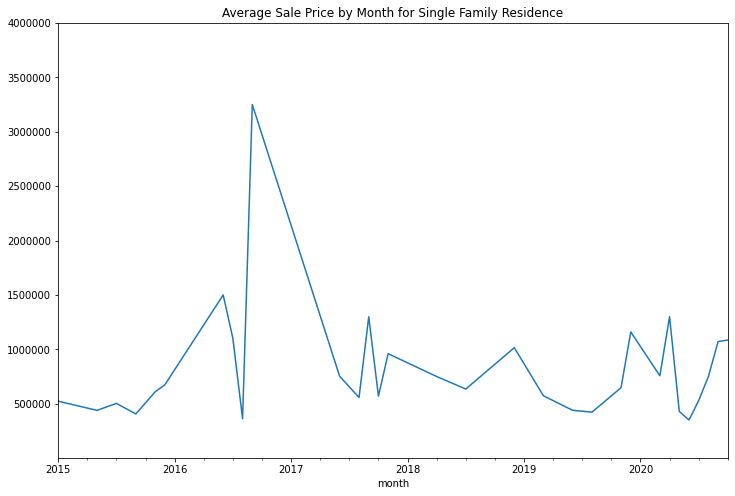

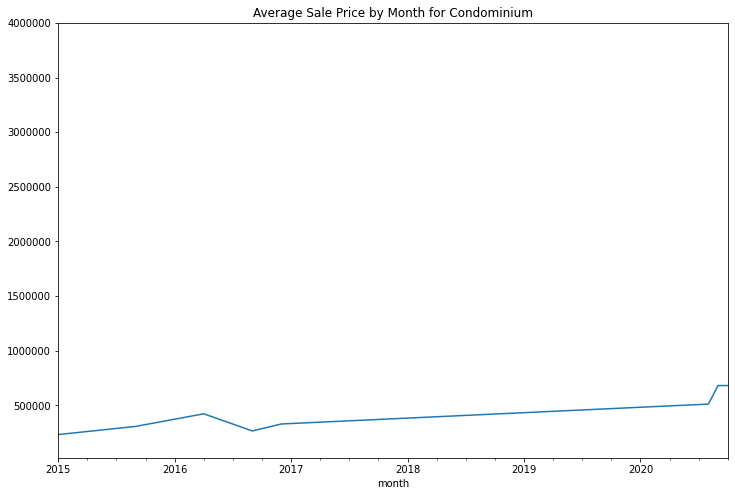

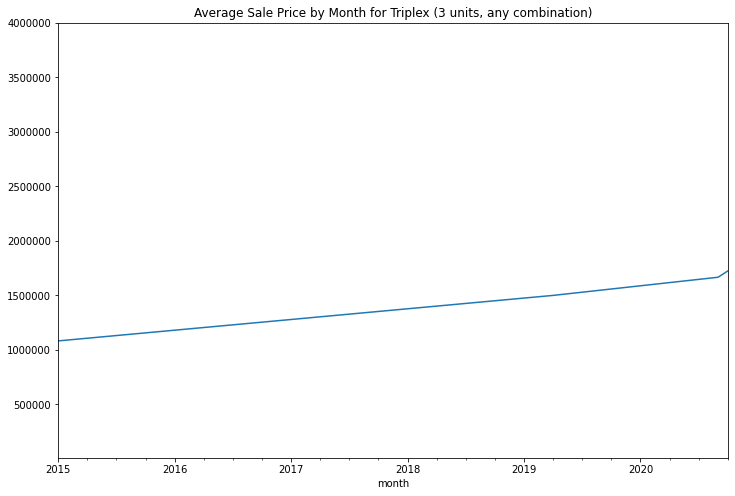

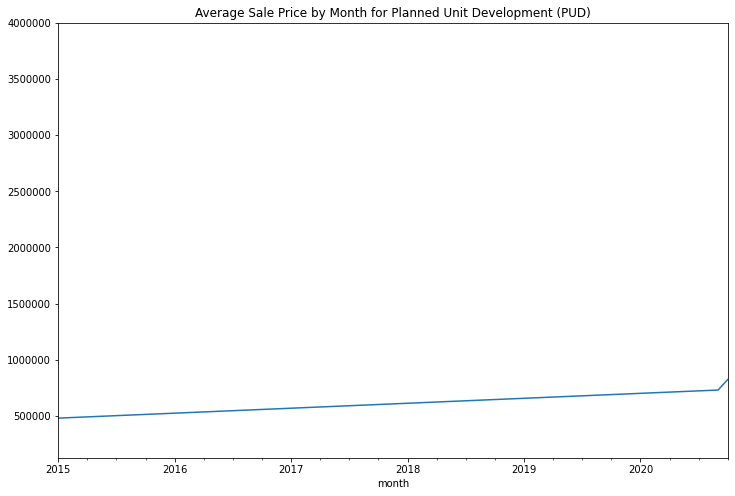

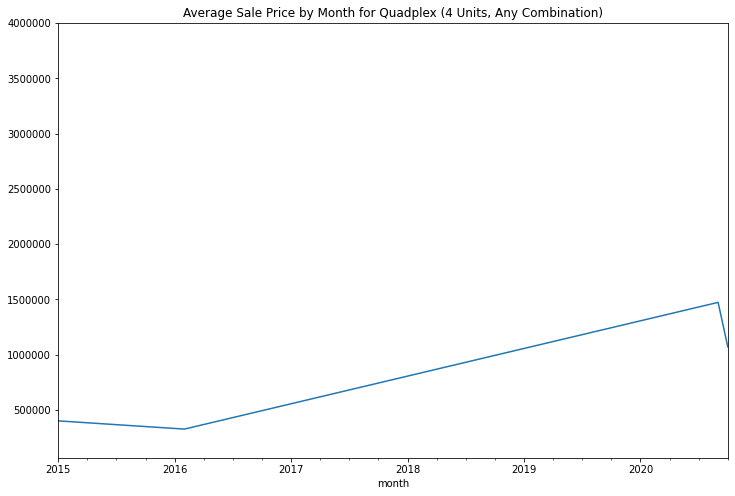

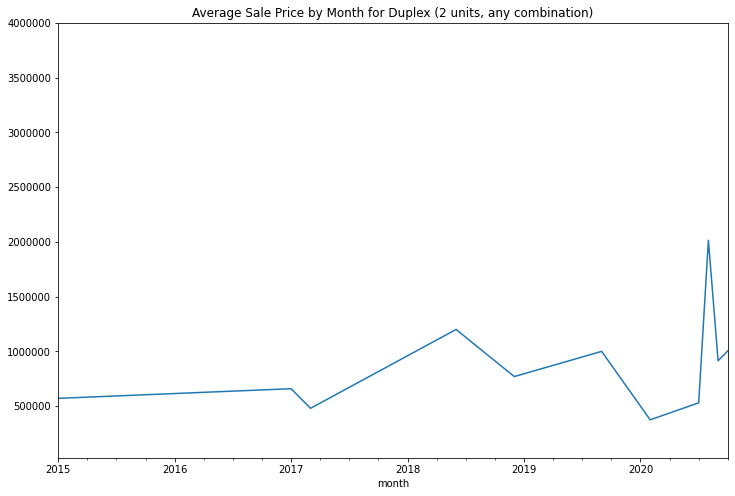

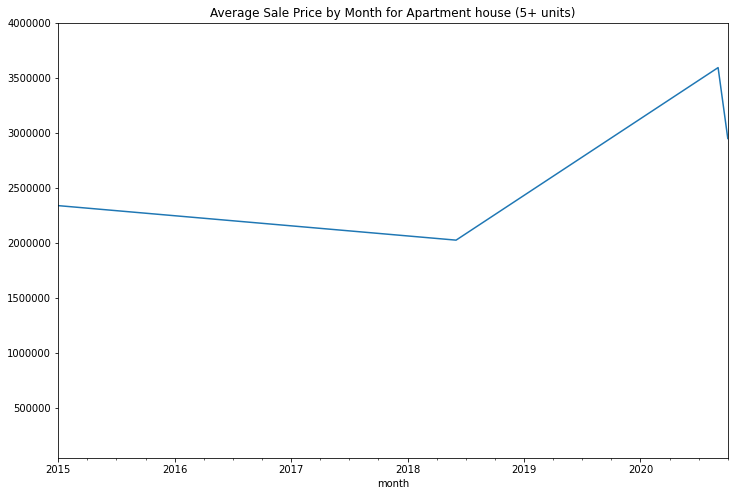

In [95]:
property_type_plot(df, 'property_type')

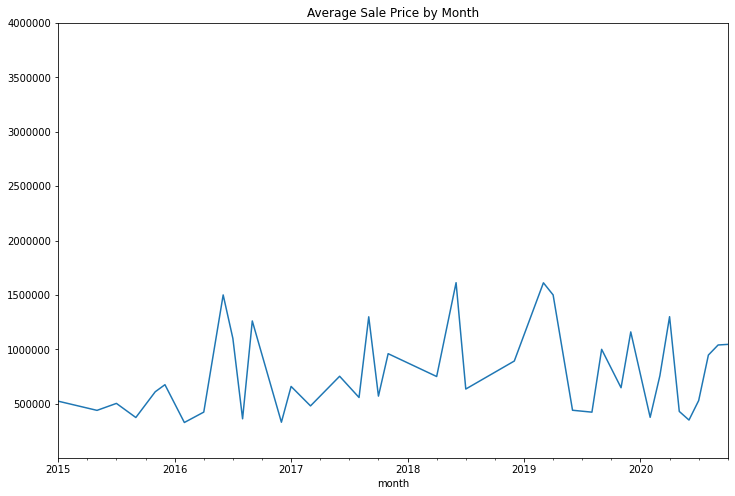

In [96]:
#Examine the trend of saleprice by month
df.groupby('month')['sale_price'].mean().plot(figsize=(12,8))
plt.ticklabel_format(style='plain', axis='y')
plt.xlim('2015-01', df['month'].max())
plt.ylim(df['sale_price'].min(), 4000000)
plt.title('Average Sale Price by Month');

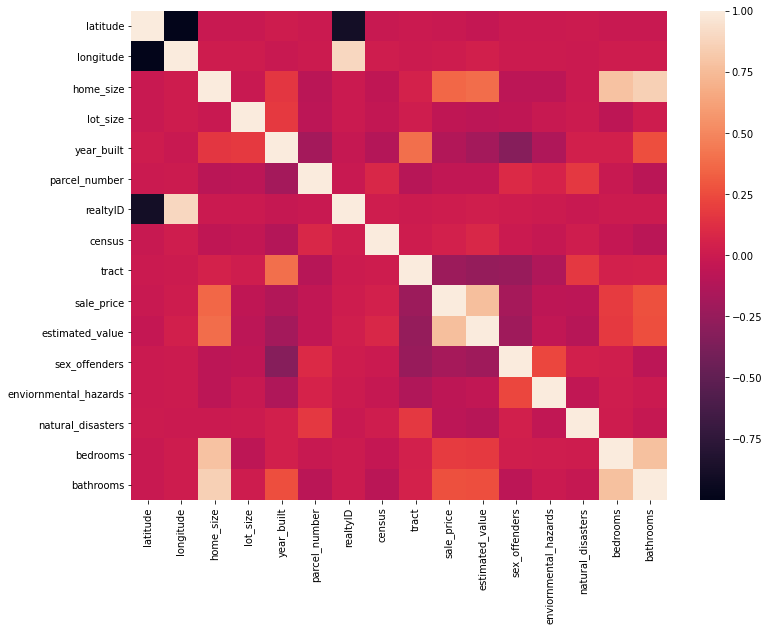

In [98]:
corrmat = df_trimmed.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat);

In [105]:
def diagnostic_plots(df, variable, labels):
  
    plt.figure(figsize=(20,6))
    plt.subplot(1,3,1)
    df[variable].hist()
    
    plt.subplot(1,3,2)
    stats.probplot(df[variable], dist='norm', plot=pylab)
    plt.title(col)
    
    plt.subplot(1,3,3)
    plt.scatter(df[variable], labels)
    plt.title(col)

In [99]:
temp = pd.concat([df.groupby('crime_index')['sale_price'].mean(), df.groupby('crime_index')['sale_price'].count()], axis=1)
temp.columns = ['Average sale price', 'Count of crime index']
temp

,Average sale price,Count of crime index
crime_index,,
High,453159.57447,47
Low,896015.62219,1289
Moderate,882994.63107,1236
Moderately High,562047.61905,84
Slightly High,1277093.52922,1249
Very Low,1192934.56145,358


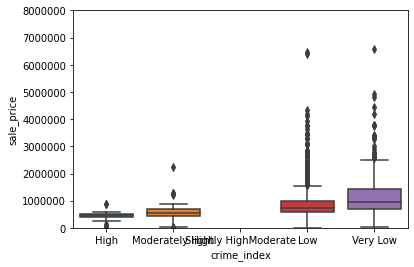

In [104]:
order=['High', 'Moderately High', 'Slightly High' 'Moderate', 'Low', 'Very Low']


boxplot = sns.boxplot(x='crime_index', y='sale_price', data=df, order=order)
plt.ylim(0,8000000)
plt.ticklabel_format(style='plain', axis='y')

In [58]:
#df.index = pd.to_datetime(df['date'], format='%Y-%m-%d')
#df.index.freq = 'D'
#df.index

In [23]:
df_trimmed.to_csv('Data/house_data_details_eda.csv', index=False)